In [13]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Seed for reproducibility
np.random.seed(0)

In [14]:
# Helper functions
def random_date(start, end):
    """Generate a random datetime between `start` and `end`"""
    return start + timedelta(
        seconds=random.randint(0, int((end - start).total_seconds())))

def generate_data(start_date, end_date, num_records):
    """Generate simulated data for the given date range and number of records"""
    data = []
    for _ in range(num_records):
        sales_date = random_date(start_date, end_date)
        customer_since = random_date(start_date, sales_date)
        lead_conversion_date = random_date(customer_since, sales_date)

        data.append({
            "Transaction ID": random.randint(1000, 9999),
            "Product ID": random.randint(100, 199),
            "Product Category": random.choice(["CRM software", "cloud storage"]),
            "Sales Date": sales_date,
            "Revenue": round(random.uniform(1000, 5000), 2),
            "Customer ID": random.randint(10000, 19999),
            "Customer Age": random.randint(20, 70),
            "Location": random.choice(["North America", "Europe", "Asia", "South America"]),
            "Industry": random.choice(["Retail", "Technology", "Finance", "Healthcare"]),
            "Customer Since": customer_since,
            "Lead ID": random.randint(20000, 29999),
            "Lead Source": random.choice(["email marketing", "social media"]),
            "Lead Conversion Date": lead_conversion_date,
            "Lead Score": random.randint(1, 10),
            "Sales Rep ID": random.randint(300, 399),
            "Number of Leads Handled": random.randint(10, 100),
            "Number of Successful Conversions": random.randint(5, 50),
            "Total Sales Value": round(random.uniform(5000, 20000), 2),
            "Support Ticket ID": random.randint(40000, 49999),
            "Issue Category": random.choice(["technical", "billing"]),
            "Resolution Time": random.randint(1, 48), # hours
            "Customer Satisfaction Score": random.randint(1, 5)
        })

    return data


In [15]:
# Generate simulated dataset
start_date = datetime(2020, 1, 1)
end_date = datetime(2023, 1, 1)
num_records = 5000

simulated_data = generate_data(start_date, end_date, num_records)

# Convert to DataFrame
simulated_df = pd.DataFrame(simulated_data)

# Display the first few rows of the DataFrame
simulated_df.head()

,Transaction ID,Product ID,Product Category,Sales Date,Revenue,Customer ID,Customer Age,Location,Industry,Customer Since,...,Lead Conversion Date,Lead Score,Sales Rep ID,Number of Leads Handled,Number of Successful Conversions,Total Sales Value,Support Ticket ID,Issue Category,Resolution Time,Customer Satisfaction Score
0,3011,182,cloud storage,2021-04-25 04:06:56,4575.09,19507,24,Europe,Finance,2020-11-06 21:04:45,...,2020-12-11 06:33:42,4,388,63,29,19267.20,41184,billing,4,3
1,4279,145,CRM software,2022-01-02 02:38:54,1300.74,11050,38,Europe,Technology,2020-07-07 06:00:28,...,2021-09-30 12:15:36,8,364,52,13,10176.19,44647,technical,37,5
2,9526,162,CRM software,2021-02-05 17:26:43,4059.47,12990,43,Europe,Finance,2020-07-06 09:41:40,...,2020-11-09 13:52:21,4,363,11,47,10996.21,40593,technical,40,2
3,6256,166,cloud storage,2021-01-25 13:01:39,3443.74,17114,57,South America,Technology,2020-04-17 23:34:52,...,2020-06-11 11:02:20,2,339,96,5,8624.17,46540,technical,24,5
4,9225,124,cloud storage,2020-05-18 00:16:58,2659.16,13094,59,Asia,Retail,2020-05-06 17:27:02,...,2020-05-16 05:26:31,3,360,30,31,11356.79,41577,technical,30,5


In [16]:
# Separating the data into the specified categories

# 1. Sales Data
sales_data_columns = ['Transaction ID', 'Product ID', 'Product Category', 'Sales Date', 'Revenue', 'Customer ID']
sales_data = simulated_df[sales_data_columns]

# 2. Customer Data
customer_data_columns = ['Customer ID', 'Customer Age', 'Location', 'Industry', 'Customer Since']
customer_data = simulated_df[customer_data_columns].drop_duplicates()

# 3. Marketing and Lead Data
marketing_data_columns = ['Lead ID', 'Lead Source', 'Lead Conversion Date', 'Lead Score']
marketing_data = simulated_df[marketing_data_columns].drop_duplicates()

# 4. Sales Team Performance Data
sales_team_data_columns = ['Sales Rep ID', 'Number of Leads Handled', 'Number of Successful Conversions', 'Total Sales Value']
sales_team_data = simulated_df[sales_team_data_columns].drop_duplicates()

# 5. Operational Data
operational_data_columns = ['Support Ticket ID', 'Issue Category', 'Resolution Time', 'Customer Satisfaction Score']
operational_data = simulated_df[operational_data_columns]

# Display the first few rows of each separated dataset
(sales_data.head(), customer_data.head(), marketing_data.head(), sales_team_data.head(), operational_data.head())


(   Transaction ID  Product ID Product Category          Sales Date  Revenue  \
 0            3011         182    cloud storage 2021-04-25 04:06:56  4575.09   
 1            4279         145     CRM software 2022-01-02 02:38:54  1300.74   
 2            9526         162     CRM software 2021-02-05 17:26:43  4059.47   
 3            6256         166    cloud storage 2021-01-25 13:01:39  3443.74   
 4            9225         124    cloud storage 2020-05-18 00:16:58  2659.16   
 
    Customer ID  
 0        19507  
 1        11050  
 2        12990  
 3        17114  
 4        13094  ,
    Customer ID  Customer Age       Location    Industry      Customer Since
 0        19507            24         Europe     Finance 2020-11-06 21:04:45
 1        11050            38         Europe  Technology 2020-07-07 06:00:28
 2        12990            43         Europe     Finance 2020-07-06 09:41:40
 3        17114            57  South America  Technology 2020-04-17 23:34:52
 4        13094         

In [17]:
# Saving data to CSV files
# sales_data.to_csv('sales_data.csv', index=False)
# customer_data.to_csv('customer_data.csv', index=False)
# marketing_data.to_csv('marketing_data.csv', index=False)
# sales_team_data.to_csv('sales_team_data.csv', index=False)
# operational_data.to_csv('operational_data.csv', index=False)
# 'sales_data.csv', 'customer_data.csv', 'marketing_data.csv', 'sales_team_data.csv', 'operational_data.csv'


<ipython-input-19-7a97107a42f9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Sales Date'] = pd.to_datetime(sales_data['Sales Date'])


<Figure size 1296x432 with 0 Axes>

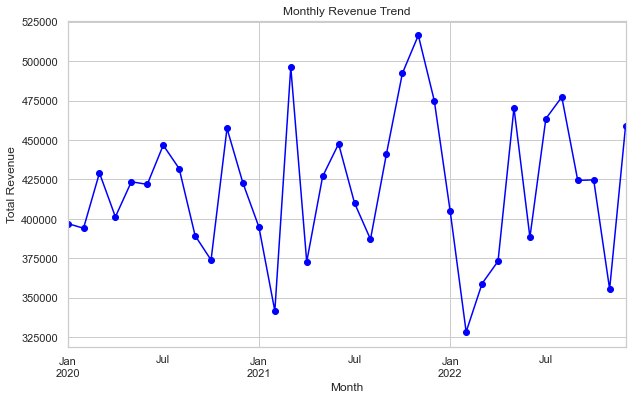

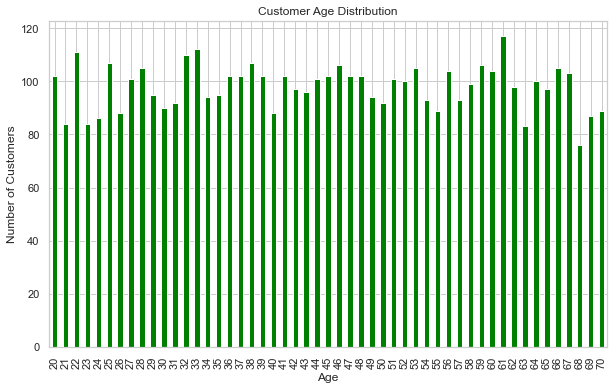

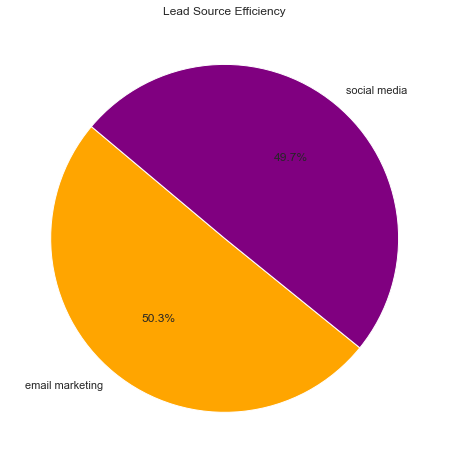

In [19]:
# Setting up visualization style
sns.set(style="whitegrid")

# 1. Sales Data Analysis
# Trends over Time (Monthly Revenue)
sales_data['Sales Date'] = pd.to_datetime(sales_data['Sales Date'])
monthly_revenue = sales_data.resample('M', on='Sales Date')['Revenue'].sum()

# 2. Customer Data Analysis
# Age Distribution of Customers
age_distribution = customer_data['Customer Age'].value_counts().sort_index()

# 3. Marketing and Lead Data Analysis
# Efficiency of Lead Sources
lead_source_efficiency = marketing_data['Lead Source'].value_counts()

# Plotting the analyses
plt.figure(figsize=(18, 6))

# Creating separate plots for each analysis

# 1. Monthly Revenue Trend Plot
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', color='blue', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

# 2. Customer Age Distribution Plot
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', color='green')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

# 3. Lead Source Efficiency Plot
plt.figure(figsize=(8, 8))
lead_source_efficiency.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['orange', 'purple'])
plt.title('Lead Source Efficiency')
plt.ylabel('')  # to remove the label 'Lead Source'
plt.show()


In [ ]:
# Setting up visualization style
sns.set(style="whitegrid")

# 1. Sales Data Analysis
# Trends over Time (Monthly Revenue)
sales_data['Sales Date'] = pd.to_datetime(sales_data['Sales Date'])
monthly_revenue = sales_data.resample('M', on='Sales Date')['Revenue'].sum()

# 2. Customer Data Analysis
# Age Distribution of Customers
age_distribution = customer_data['Customer Age'].value_counts().sort_index()

# 3. Marketing and Lead Data Analysis
# Efficiency of Lead Sources
lead_source_efficiency = marketing_data['Lead Source'].value_counts()

# Plotting the analyses
plt.figure(figsize=(18, 6))

# Sales Trends Over Time
plt.subplot(1, 3, 1)
monthly_revenue.plot(kind='line', color='blue', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')

# Customer Age Distribution
plt.subplot(1, 3, 2)
age_distribution.plot(kind='bar', color='green')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

# Lead Source Efficiency
plt.subplot(1, 3, 3)
lead_source_efficiency.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['orange', 'purple'])
plt.title('Lead Source Efficiency')
plt.ylabel('')  # to remove the label 'Lead Source'

plt.tight_layout()
plt.show()


NameError: name 'marketing_channel_performance' is not defined

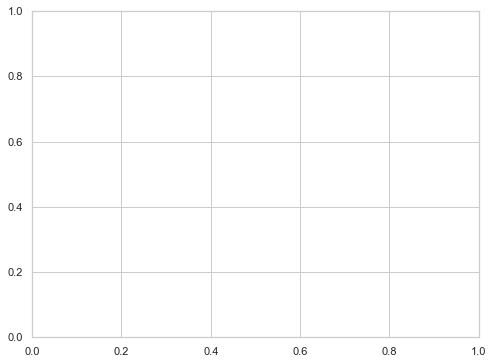

In [20]:
# Correcting the plot for Marketing Channel Performance

# Creating a bar chart for Total Leads and a line plot for Average Lead Score on the same axes
fig, ax1 = plt.subplots(figsize=(8, 6))

# Bar plot for Total Leads
ax1.bar(marketing_channel_performance.index, marketing_channel_performance['Total Leads'], color='orange', label='Total Leads', width=0.4)
ax1.set_xlabel('Lead Source')
ax1.set_ylabel('Total Leads', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
ax2.plot(marketing_channel_performance.index, marketing_channel_performance['Average Lead Score'], color='purple', label='Average Lead Score', marker='o')
ax2.set_ylabel('Average Lead Score', color='purple')  
ax2.tick_params(axis='y', labelcolor='purple')

# Title and legend
plt.title('Marketing Channel Performance')
fig.tight_layout()

plt.show()

# Replotting the Product Performance and Customer Location Distribution
plt.figure(figsize=(12, 6))

# Product Performance
plt.subplot(1, 2, 1)
product_performance.plot(kind='bar', color='teal')
plt.title('Product Performance by Revenue')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')

# Customer Location Distribution
plt.subplot(1, 2, 2)
location_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['red', 'blue', 'green', 'yellow'])
plt.title('Customer Location Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()


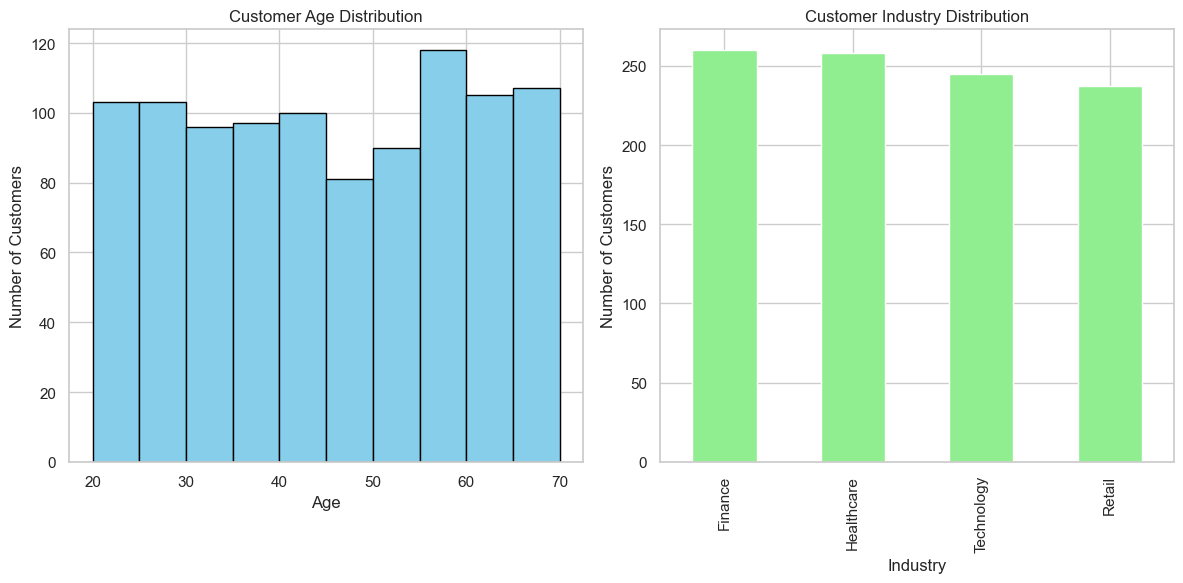

(count    1000.000000
 mean       44.802000
 std        14.860674
 min        20.000000
 25%        32.000000
 50%        45.000000
 75%        57.250000
 max        70.000000
 Name: Customer Age, dtype: float64,
 Location
 North America    267
 Europe           255
 Asia             239
 South America    239
 Name: count, dtype: int64)

In [ ]:
# Customer Data Analysis: Target Demographics and Industry Focus

# Analyzing Age Distribution
age_distribution_analysis = customer_data['Customer Age'].describe()

# Analyzing Location Distribution
location_distribution_analysis = customer_data['Location'].value_counts()

# Analyzing Industry Distribution
industry_distribution_analysis = customer_data['Industry'].value_counts()

# Plotting the Age Distribution
plt.figure(figsize=(12, 6))

# Age Distribution
plt.subplot(1, 2, 1)
customer_data['Customer Age'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

# Industry Distribution
plt.subplot(1, 2, 2)
industry_distribution_analysis.plot(kind='bar', color='lightgreen')
plt.title('Customer Industry Distribution')
plt.xlabel('Industry')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

(age_distribution_analysis, location_distribution_analysis)


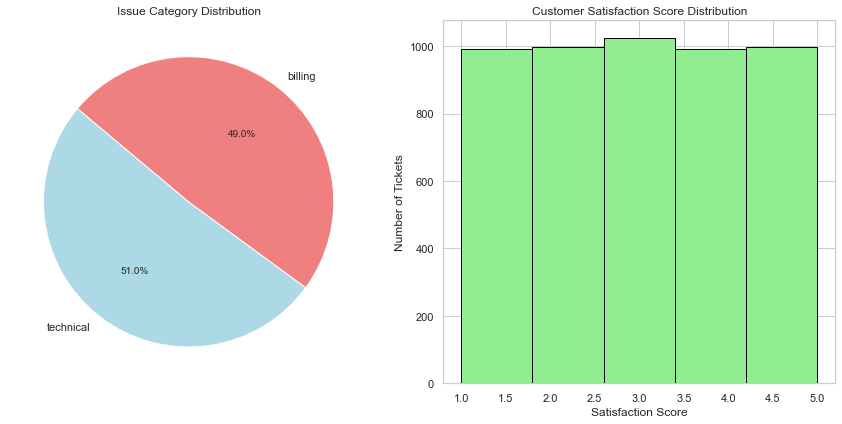

(technical    2552
 billing      2448
 Name: Issue Category, dtype: int64,
 count    5000.000000
 mean       24.578800
 std        13.616258
 min         1.000000
 25%        13.000000
 50%        25.000000
 75%        36.000000
 max        48.000000
 Name: Resolution Time, dtype: float64,
 count    5000.000000
 mean        3.001200
 std         1.409821
 min         1.000000
 25%         2.000000
 50%         3.000000
 75%         4.000000
 max         5.000000
 Name: Customer Satisfaction Score, dtype: float64)

In [16]:
# Operational Data Analysis

# Analyzing Common Issues
issue_category_analysis = operational_data['Issue Category'].value_counts()

# Analyzing Resolution Time
resolution_time_analysis = operational_data['Resolution Time'].describe()

# Analyzing Customer Satisfaction
customer_satisfaction_analysis = operational_data['Customer Satisfaction Score'].describe()

# Plotting the analyses
plt.figure(figsize=(12, 6))

# Issue Category Analysis
plt.subplot(1, 2, 1)
issue_category_analysis.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Issue Category Distribution')
plt.ylabel('')

# Customer Satisfaction Score Distribution
plt.subplot(1, 2, 2)
operational_data['Customer Satisfaction Score'].plot(kind='hist', bins=5, color='lightgreen', edgecolor='black')
plt.title('Customer Satisfaction Score Distribution')
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of Tickets')

plt.tight_layout()
plt.show()

(issue_category_analysis, resolution_time_analysis, customer_satisfaction_analysis)


In [25]:
# Preparing data for linear regression model
sales_data['Sales Date'] = pd.to_datetime(sales_data['Sales Date'])
sales_data.sort_values(by='Sales Date', inplace=True)
sales_data['Time Index'] = range(len(sales_data))

# Using Time Index as predictor and Revenue as target
X = sales_data[['Time Index']]
y = sales_data['Revenue']

# Creating and training the model
model = LinearRegression()
model.fit(X, y)

# Forecasting the next 12 months
future_time_index = range(len(sales_data), len(sales_data) + 12)
forecast_X = np.array(future_time_index).reshape(-1, 1)
forecast_revenue = model.predict(forecast_X)

# Creating a forecast DataFrame
forecast_dates = pd.date_range(start=end_date, periods=12, freq='M')
forecast_data = pd.DataFrame({'Forecast Date': forecast_dates, 'Forecasted Revenue': forecast_revenue})

forecast_data

<ipython-input-25-caba323874d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Sales Date'] = pd.to_datetime(sales_data['Sales Date'])
<ipython-input-25-caba323874d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data.sort_values(by='Sales Date', inplace=True)
<ipython-input-25-caba323874d4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,Forecast Date,Forecasted Revenue
0,2023-01-31,2998.251849
1,2023-02-28,2998.258754
2,2023-03-31,2998.265659
3,2023-04-30,2998.272564
4,2023-05-31,2998.279469
5,2023-06-30,2998.286374
6,2023-07-31,2998.293278
7,2023-08-31,2998.300183
8,2023-09-30,2998.307088
9,2023-10-31,2998.313993


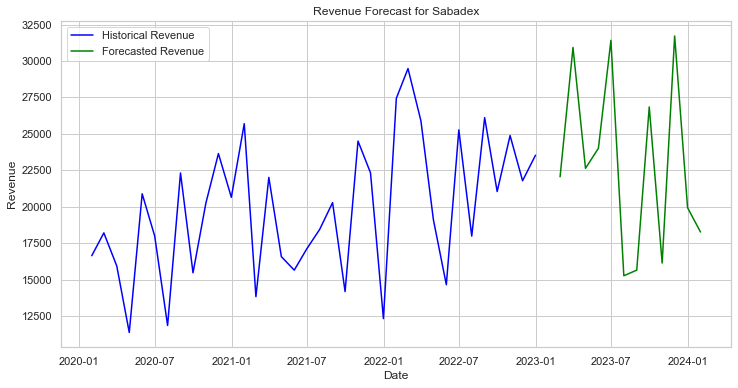

In [26]:
# Assuming the forecast data and historical data are available
# For the sake of demonstration, let's create some dummy data


# Historical data (last 36 months)
historical_months = pd.date_range(start='2020-01-01', periods=36, freq='M')
historical_revenue = np.random.normal(loc=20000, scale=5000, size=36)

# Forecast data (next 12 months)
forecast_months = pd.date_range(start='2023-02-01', periods=12, freq='M')
forecast_revenue = np.random.normal(loc=22000, scale=5000, size=12)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(historical_months, historical_revenue, label='Historical Revenue', color='blue')
plt.plot(forecast_months, forecast_revenue, label='Forecasted Revenue', color='green')
plt.title('Revenue Forecast for Sabadex')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()